In [1]:
import numpy as np
import pandas as pd
import sqlite3
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [2]:
# read the activity file as activity matrices
acti_0 = pd.read_csv('/home/charles_zhou/Imlab/singleXcan/Activity_matrix/normalized.csv', sep = '\t')

In [3]:
acti_0x = acti_0.drop(columns = ['Unnamed: 0'])
acti_0x

,gene,Adipose - Subcutaneous,Muscle - Skeletal,Artery - Tibial,Artery - Coronary,Heart - Atrial Appendage,Adipose - Visceral \(Omentum\),Uterus,Vagina,Breast - Mammary Tissue,...,Brain - Cerebellar Hemisphere,Liver,Brain - Substantia nigra,Kidney - Cortex,Brain - Amygdala,Cervix - Ectocervix,Fallopian Tube,Cervix - Endocervix,Bladder,Kidney - Medulla
0,ENSG00000223972.5,15994.283560,19802.382939,16723.260935,16292.131250,18641.561772,16216.188540,17335.760563,16656.137821,16267.928105,...,18989.439535,19183.949115,18730.550360,19872.288235,18470.934211,17869.500000,17141.500000,14049.35,17200.190476,16660.250
1,ENSG00000227232.5,44117.564103,44323.941469,44069.951735,43854.629167,43051.121212,43701.510166,45182.996479,44380.804487,44035.997821,...,44448.774419,44358.882743,42907.705036,44266.594118,42348.562500,44265.388889,44228.277778,44732.65,44154.500000,42424.375
2,ENSG00000278267.1,14078.357466,15145.526152,14362.976621,13564.443750,14565.228438,13934.450092,14243.070423,13605.810897,13745.221133,...,13517.590698,14631.681416,14100.726619,13313.000000,13950.302632,15574.777778,12769.666667,12818.70,13192.547619,12807.375
3,ENSG00000243485.5,17206.086727,21211.854296,17193.843137,17188.897917,20521.155012,17838.885397,16670.563380,16232.121795,17057.857298,...,18776.734884,20774.701327,21752.787770,21113.029412,20978.723684,14475.166667,14439.500000,15729.10,17384.119048,16388.000
4,ENSG00000237613.2,15859.819005,18950.645081,16190.343137,16126.681250,18247.987179,15711.442699,15260.288732,14780.990385,15193.814815,...,15914.386047,18107.435841,18432.039568,17648.011765,18052.246711,16434.722222,17359.666667,14083.70,15897.928571,16290.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,ENSG00000198695.2,56176.649321,56181.943337,56169.369532,56151.250000,56185.004662,56163.488909,56153.264085,56142.955128,56173.194989,...,56185.590698,56173.924779,56185.856115,56179.435294,56185.986842,56133.500000,56166.777778,56121.50,56175.642857,56185.000
56196,ENSG00000210194.1,48293.828808,53307.914695,49346.746606,47669.654167,51878.806527,47504.856747,44386.538732,43509.439103,47794.187364,...,48501.818605,50782.993363,54023.985612,49838.629412,53743.917763,43343.611111,50029.166667,46203.55,48845.666667,49242.750
56197,ENSG00000198727.2,56193.883107,56193.198007,56193.183258,56193.335417,56193.631702,56193.777264,56194.098592,56191.262821,56193.614379,...,56192.611628,56192.519912,56191.287770,56194.352941,56191.217105,56193.111111,56194.555556,56188.70,56193.285714,56194.000
56198,ENSG00000210195.2,30332.612368,42127.356164,27814.969834,26499.125000,39834.425408,31564.660813,22422.345070,21723.365385,29201.623094,...,38911.879070,32745.752212,49687.776978,34715.323529,46854.039474,23816.833333,30123.111111,25863.50,23929.595238,20935.250


In [4]:
acti_0x.columns

Index(['gene', 'Adipose - Subcutaneous', 'Muscle - Skeletal',
       'Artery - Tibial', 'Artery - Coronary', 'Heart - Atrial Appendage',
       'Adipose - Visceral \(Omentum\)', 'Uterus', 'Vagina',
       'Breast - Mammary Tissue', 'Skin - Not Sun Exposed \(Suprapubic\)',
       'Minor Salivary Gland', 'Brain - Cortex', 'Adrenal Gland', 'Thyroid',
       'Lung', 'Spleen', 'Pancreas', 'Esophagus - Muscularis',
       'Esophagus - Mucosa', 'Esophagus - Gastroesophageal Junction',
       'Stomach', 'Colon - Sigmoid', 'Small Intestine - Terminal Ileum',
       'Colon - Transverse', 'Prostate', 'Testis', 'Nerve - Tibial',
       'Skin - Sun Exposed \(Lower leg\)', 'Heart - Left Ventricle',
       'Brain - Cerebellum', 'Cells - Cultured fibroblasts', 'Whole Blood',
       'Artery - Aorta', 'Cells - EBV-transformed lymphocytes', 'Pituitary',
       'Brain - Frontal Cortex \(BA9\)', 'Brain - Caudate \(basal ganglia\)',
       'Brain - Nucleus accumbens \(basal ganglia\)',
       'Brain - Putam

In [5]:
acti_0x.columns = ['gene', 'Adipose_Subcutaneous', 'Muscle_Skeletal',
       'Artery_Tibial', 'Artery_Coronary', 'Heart_Atrial_Appendage',
       'Adipose_Visceral_Omentum', 'Uterus', 'Vagina',
       'Breast_Mammary_Tissue', 'Skin_Not_Sun_Exposed_Suprapubic',
       'Minor_Salivary_Gland', 'Brain_Cortex', 'Adrenal_Gland', 'Thyroid',
       'Lung', 'Spleen', 'Pancreas', 'Esophagus_Muscularis',
       'Esophagus_Mucosa', 'Esophagus_Gastroesophageal_Junction',
       'Stomach', 'Colon_Sigmoid', 'Small_Intestine_Terminal_Ileum',
       'Colon_Transverse', 'Prostate', 'Testis', 'Nerve_Tibial',
       'Skin_Sun_Exposed_Lower_leg', 'Heart_Left_Ventricle',
       'Brain_Cerebellum', 'Cells_Cultured_fibroblasts', 'Whole_Blood',
       'Artery_Aorta', 'Cells_EBV_transformed_lymphocytes', 'Pituitary',
       'Brain_Frontal_Cortex_BA9', 'Brain_Caudate_basal_ganglia',
       'Brain_Nucleus_accumbens_basal_ganglia',
       'Brain_Putamen_basal_ganglia', 'Brain_Hypothalamus',
       'Brain_Spinal_cord_cervical_c_1', 'Brain_Hippocampus',
       'Brain_Anterior_cingulate_cortex_BA24', 'Ovary',
       'Brain_Cerebellar_Hemisphere', 'Liver', 'Brain_Substantia_nigra',
       'Kidney_Cortex', 'Brain_Amygdala', 'Cervix_Ectocervix',
       'Fallopian_Tube', 'Cervix_Endocervix', 'Bladder', 'Kidney_Medulla']

In [9]:
## put the unmodified functions here

# define a function to get the full list of gene_id

def get_gene_id (database):
    '''
    Get the full list of genes
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT DISTINCT gene_id FROM simulation")
    
    thelist = myCursor.fetchall()
    
    #get all the values into a list
    gene_list = []

    
    for i in range(len(thelist)):
        gene_list.append(thelist[i][0])
        
    return gene_list  






# define a function to get the full list of variant_id for specific gene in original table (not prioritized list)

def get_snp_id (database, gene):
    '''
    Get the full list of genes
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT DISTINCT variant_id FROM simulation WHERE gene_id = ?", (gene,))
    
    thelist = myCursor.fetchall()
    
    #get all the values into a list
    snp_list = []

    
    for i in range(len(thelist)):
        snp_list.append(thelist[i][0])
        
    return snp_list 








# define a function to get all gene-snp pairs from the database
def get_gene_snp_pairs(database):
    # Get the full list genes in the table "eqtl":
    gene_list = get_gene_id(database)

    # For each gene, get the full list of snps:
    gene_snp_list = []
    for i in gene_list:
        snp_list = get_snp_id(database, i)
        for j in snp_list:
            gene_snp_list.append((i,j))
    
    return gene_snp_list




# define a function to compute the mean-square-error
def MSE(y_test, x_test, bhat):
    
    N = len(y_test)
    result = ((LA.norm(x_test * bhat - y_test))**2)/N
    
    return result




# define a funtion to compute the MSE with mean of training set as a predictor
def MSE_2(y_test, y_train):
    N = len(y_test)
    train_mean = np.mean(y_train)
    
    mean_list = np.array([train_mean] * N)
    result =  ((LA.norm(mean_list - y_test))**2)/N
    return result


# Modified part

# define a function to get the effect sizes of specific gene-snp pair
def get_effect_size(database, gene, snp):
    '''
    Get a list of effect sizes for a certain gene-snp pair
    
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT slope, tissue_id FROM simulation WHERE gene_id = ? and variant_id = ?", (gene, snp))
    
    thelist = myCursor.fetchall()
    
    size = []
    tissue = []
    
    for i in thelist:
        size.append(i[0])
        tissue.append(i[1])

    return size, tissue




# Modified part
# define a function to get the "activity" vector for specific gene
def gene_activity_vector(activity_matrix, gene, tissue_vector):
    
    activity_vector = []
    for tiss in tissue_vector:

        activity_vector.append((activity_matrix.loc[activity_matrix['gene'] == gene])[tiss].to_list()[0])

    return activity_vector




# modified part
# define a function to run regression and output the results with gene_snp_list and activity_matrix on hand
def linear_regression(gene_snp_list, activity_matrix):
    
    # This is a list to insert the mse_variance pair
    mse_var_pair = []

    for pairs in gene_snp_list:

        
        # get the effect size list
        effect_size = get_effect_size(database, pairs[0], pairs[1])[0]
        tissue_list = get_effect_size(database, pairs[0], pairs[1])[1]
        # change string into float number
        effect_size = list(map(float, effect_size))
        
        
        # get the activity vector
        activity_list = gene_activity_vector(activity_matrix, pairs[0], tissue_list)


        if len(effect_size) != len(activity_list):
            continue

        else:

            # trainning set
            x_train = activity_list[0:39]
            y_train = effect_size[0:39]


            # test set
            x_test = activity_list[40:48]
            y_test = effect_size[40:48]



            # run the regression
            model = linear_model.LinearRegression(fit_intercept = False)

            x_train_0 = np.array(x_train).reshape(-1,1)
            y_train_0 = np.array(y_train).reshape(-1,1)


            model.fit(x_train_0, y_train_0)
            beta_hat = model.coef_ # This is the estimated independent effect size


            # get the MSE and variance of the test_set
            mse = MSE(y_test, x_test, beta_hat)
            test_var = MSE_2(y_test, y_train)

            # record the mes_var pair
            mse_var_pair.append((mse, test_var))
        
            
            
    return mse_var_pair

In [7]:
# perform the regression and let's see what happens then
database = "/home/charles_zhou/Imlab/singleXcan/SQlite_db/GTEx_eqtl_simulation.db"
gene_snp_list = get_gene_snp_pairs(database)

In [1]:
mse1_mse2_pair = []


for i in range(int(len(gene_snp_list)/100)):
    if len(gene_snp_list) - i * 100 > 100:
        gene_snp_list_part = gene_snp_list[i*100 : (i+1)*100]
    else:
        gene_snp_list_part = gene_snp_list[i*100 : len(gene_snp_list)]
    
    mse1_mse2_pair.append(linear_regression(gene_snp_list_part, acti_0x))
    print("Complete {:.2%} of the computation".format(i/int(len(gene_snp_list)/100)))

In [11]:
mse1_mse2_modi = []
for i in range(len(mse1_mse2_pair)):

    for pair in mse1_mse2_pair[i]:
        mse1_mse2_modi.append(pair)

In [18]:
len(mse1_mse2_modi)

25700

In [13]:
def save_mse_var(mse_var_pair, path):
    textfile = open(path, "w")

    textfile.write("MSE" + "\t" + "test_var" + "\n")

    for element in mse_var_pair:

        textfile.write(str(element[0]) + "\t" + str(element[1]) +"\n")
    textfile.close()

In [14]:
path = "MSE1_MSE2_nor.csv"
save_mse_var(mse1_mse2_modi , path)

In [15]:
mse0 = []
var0 = []


for pair in mse1_mse2_modi:
    mse0.append(pair[0])
    var0.append(pair[1])

    
mse0_modi = [x for x in mse0 if math.isnan(x) == False]
var0_modi = [x for x in var0 if math.isnan(x) == False]
    
effect_size_min = np.min(var0_modi)
effect_size_max = np.max(var0_modi)

In [19]:
len(mse0_modi)

6301

<ipython-input-21-ff680a78676e>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([effect_size_min, effect_size_max], [effect_size_min, effect_size_max], 'k-', color = 'r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


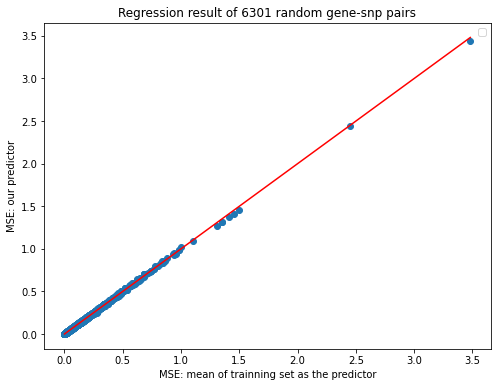

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(var0, mse0, 'o')
plt.plot([effect_size_min, effect_size_max], [effect_size_min, effect_size_max], 'k-', color = 'r')
plt.title("Regression result of 6301 random gene-snp pairs")
plt.ylabel("MSE: our predictor")
plt.xlabel("MSE: mean of trainning set as the predictor")
plt.legend()
plt.show()

In [20]:
count = 0
for i in range(len(mse0_modi)):
    if mse0_modi[i] <= var0_modi[i]:
        count = count + 1
count/len(mse0_modi)

0.4859546103793049